<a href="https://colab.research.google.com/github/ijenims/Materials/blob/main/Profitable_AI_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pythonで儲かるAIをつくる

https://github.com/makaishi2/profitable_ai_book_info

## 3章　機械学習モデルの開発手順

https://github.com/makaishi2/profitable_ai_book_info/blob/master/notebooks/ch03_03_first_ml.ipynb

2022.3.16～

In [2]:
!pip install japanize-matplotlib | tail -n 1    # 日本語化ライブラリ

In [3]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# ライブタリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# Numpyの表示精度
np.set_printoptions(suppress=True, precision=4)
# pandasでの表示精度
pd.options.display.float_format = '{:.4f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns", None)
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# 乱数の種
random_seed = 123

In [ ]:
# がん疾患データセットのロード

# ライブラリのimport
from sklearn.datasets import load_breast_cancer

# データのロード
cancer = load_breast_cancer()

# データの注釈を読む
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# データフレームへの取り込み

columns = [
    '半径_平均', 'きめ_平均', '周長_平均', '面積_平均', 
    '平滑度_平均','コンパクト度_平均', '凹面_平均',
    '凹点_平均', '対称性_平均', 'フラクタル度_平均',
    '半径_標準誤差', 'きめ_標準誤差', '周長_標準誤差',
    '面積_標準誤差', '平滑度_標準誤差',
    'コンパクト度_標準誤差', '凹面_標準誤差', '凹点_標準誤差',
    '対称性_標準誤差', 'フラクタル度_標準誤差',
    '半径_最大', 'きめ_最大', '周長_最大', '面積_最大', 
    '平滑度_最大','コンパクト度_最大', '凹面_最大', '凹点_最大', 
    '対称性_最大', 'フラクタル度_最大'
]

# ロードしたデータのデータフレームへの取り込み
df = pd.DataFrame(cancer.data, columns=columns)

# 正解データの取得
y = pd.Series(cancer.target)

In [ ]:
df

,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.5600,22.3900,142.0000,1479.0000,0.1110,0.1159,0.2439,0.1389,0.1726,0.0562,1.1760,1.2560,7.6730,158.7000,0.0103,0.0289,0.0520,0.0245,0.0111,0.0042,25.4500,26.4000,166.1000,2027.0000,0.1410,0.2113,0.4107,0.2216,0.2060,0.0712
565,20.1300,28.2500,131.2000,1261.0000,0.0978,0.1034,0.1440,0.0979,0.1752,0.0553,0.7655,2.4630,5.2030,99.0400,0.0058,0.0242,0.0395,0.0168,0.0190,0.0025,23.6900,38.2500,155.0000,1731.0000,0.1166,0.1922,0.3215,0.1628,0.2572,0.0664
566,16.6000,28.0800,108.3000,858.1000,0.0846,0.1023,0.0925,0.0530,0.1590,0.0565,0.4564,1.0750,3.4250,48.5500,0.0059,0.0373,0.0473,0.0156,0.0132,0.0039,18.9800,34.1200,126.7000,1124.0000,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782
567,20.6000,29.3300,140.1000,1265.0000,0.1178,0.2770,0.3514,0.1520,0.2397,0.0702,0.7260,1.5950,5.7720,86.2200,0.0065,0.0616,0.0712,0.0166,0.0232,0.0062,25.7400,39.4200,184.6000,1821.0000,0.1650,0.8681,0.9387,0.2650,0.4087,0.1240


In [ ]:
display(df[20:25])

,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
22,15.3400,14.2600,102.5000,704.4000,0.1073,0.2135,0.2077,0.0976,0.2521,0.0703,0.4388,0.7096,3.3840,44.9100,0.0068,0.0533,0.0645,0.0225,0.0367,0.0044,18.0700,19.0800,125.1000,980.9000,0.1390,0.5954,0.6305,0.2393,0.4667,0.0995
23,21.1600,23.0400,137.2000,1404.0000,0.0943,0.1022,0.1097,0.0863,0.1769,0.0528,0.6917,1.1270,4.3030,93.9900,0.0047,0.0126,0.0171,0.0104,0.0108,0.0020,29.1700,35.5900,188.0000,2615.0000,0.1401,0.2600,0.3155,0.2009,0.2822,0.0753
24,16.6500,21.3800,110.0000,904.6000,0.1121,0.1457,0.1525,0.0917,0.1995,0.0633,0.8068,0.9017,5.4550,102.6000,0.0060,0.0188,0.0274,0.0113,0.0147,0.0028,26.4600,31.5600,177.0000,2215.0000,0.1805,0.3578,0.4695,0.2095,0.3613,0.0956


In [ ]:
print(y[20:25])

20    1
21    1
22    0
23    0
24    0
dtype: int64


In [ ]:
print(df.shape)
print()

print(y.value_counts())

(569, 30)

1    357
0    212
dtype: int64


In [ ]:
# 散布図描画の準備
# データを正解データ=0 のグループと正解データ=1 のグループに分割する

# 正解データ＝０（悪性）
df0 = df[y==0]

# 正解データ＝１（良性）
df1 = df[y==1]

display(df0.head())
display(df1.head())

,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


,半径_平均,きめ_平均,周長_平均,面積_平均,平滑度_平均,コンパクト度_平均,凹面_平均,凹点_平均,対称性_平均,フラクタル度_平均,半径_標準誤差,きめ_標準誤差,周長_標準誤差,面積_標準誤差,平滑度_標準誤差,コンパクト度_標準誤差,凹面_標準誤差,凹点_標準誤差,対称性_標準誤差,フラクタル度_標準誤差,半径_最大,きめ_最大,周長_最大,面積_最大,平滑度_最大,コンパクト度_最大,凹面_最大,凹点_最大,対称性_最大,フラクタル度_最大
19,13.5400,14.3600,87.4600,566.3000,0.0978,0.0813,0.0666,0.0478,0.1885,0.0577,0.2699,0.7886,2.0580,23.5600,0.0085,0.0146,0.0239,0.0132,0.0198,0.0023,15.1100,19.2600,99.7000,711.2000,0.1440,0.1773,0.2390,0.1288,0.2977,0.0726
20,13.0800,15.7100,85.6300,520.0000,0.1075,0.1270,0.0457,0.0311,0.1967,0.0681,0.1852,0.7477,1.3830,14.6700,0.0041,0.0190,0.0170,0.0065,0.0168,0.0024,14.5000,20.4900,96.0900,630.5000,0.1312,0.2776,0.1890,0.0728,0.3184,0.0818
21,9.5040,12.4400,60.3400,273.9000,0.1024,0.0649,0.0296,0.0208,0.1815,0.0691,0.2773,0.9768,1.9090,15.7000,0.0096,0.0143,0.0198,0.0142,0.0203,0.0030,10.2300,15.6600,65.1300,314.9000,0.1324,0.1148,0.0887,0.0623,0.2450,0.0777
37,13.0300,18.4200,82.6100,523.8000,0.0898,0.0377,0.0256,0.0292,0.1467,0.0586,0.1839,2.3420,1.1700,14.1600,0.0044,0.0049,0.0134,0.0116,0.0267,0.0018,13.3000,22.8100,84.4600,545.9000,0.0970,0.0462,0.0483,0.0501,0.1987,0.0617
46,8.1960,16.8400,51.7100,201.9000,0.0860,0.0594,0.0159,0.0059,0.1769,0.0650,0.1563,0.9567,1.0940,8.2050,0.0090,0.0165,0.0159,0.0059,0.0257,0.0026,8.9640,21.9600,57.2600,242.2000,0.1297,0.1357,0.0688,0.0256,0.3105,0.0741


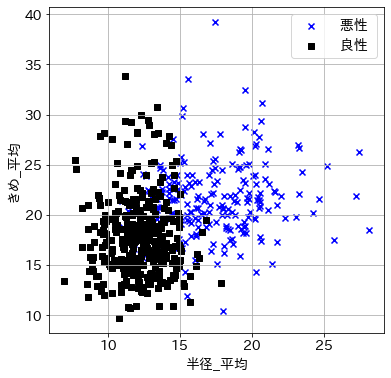

In [ ]:
# 散布図表示

plt.figure(figsize=(6, 6))

plt.scatter(df0['半径_平均'], df0['きめ_平均'], marker='x', c='b', label=' 悪性 ')
plt.scatter(df1['半径_平均'], df1['きめ_平均'], marker='s', c='k', label=' 良性 ')

plt.grid()

plt.xlabel('半径_平均')
plt.ylabel('きめ_平均')

plt.legend()

plt.show()

In [ ]:
input_columns = ['半径_平均', 'きめ_平均']
x = df[input_columns]
display(x.head())

,半径_平均,きめ_平均
0,17.9900,10.3800
1,20.5700,17.7700
2,19.6900,21.2500
3,11.4200,20.3800
4,20.2900,14.3400


In [ ]:
# 訓練データと検証データの分割

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

In [ ]:
# 分割結果の確認（要素数）

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 2)
(171, 2)
(398,)
(171,)


In [ ]:
display(x_train.head())
display(x_test.head())
display(y_train.head())
display(y_test.head())

,半径_平均,きめ_平均
559,11.5100,23.9300
295,13.7700,13.2700
264,17.1900,22.0700
125,13.8500,17.2100
280,19.1600,26.6000


,半径_平均,きめ_平均
333,11.2500,14.7800
273,9.7420,15.6700
201,17.5400,19.3200
178,13.0100,22.2200
85,18.4600,18.5200


559    1
295    1
264    0
125    1
280    0
dtype: int64

333    1
273    1
201    0
178    1
85     0
dtype: int64

In [ ]:
# アルゴリズム選択

from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

In [ ]:
# 学習

algorithm.fit(x_train, y_train)
print(algorithm)

LogisticRegression(random_state=123)


In [ ]:
# 予測

y_pred = algorithm.predict(x_test)
print(y_pred)

[1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1]


In [ ]:
# 正解データと予測結果の比較

# 正解データ　先頭から10個
# y_testは DataFrameなので、valuesにより NumPyに変換しておく
y_test10 = y_test[:10].values
print(y_test10)

# 予測結果　先頭から10個
y_pred10 = y_pred[:10]
print(y_pred10)

[1 1 0 1 0 1 1 0 1 1]
[1 1 0 1 0 1 1 1 1 1]


In [ ]:
# 正解数のカウント

# 正解データ＝予測結果
w1 = (y_test10 == y_pred10)
print(w1)

# 正解データの数
w2 = w1.sum()
print(w2)

[ True  True  True  True  True  True  True False  True  True]
9


In [ ]:
# 精度の計算

# 正解数
w = (y_test.values == y_pred)
correct = w.sum()

# 検証データ全体数
N = len(w)

# 精度＝（正解数）／（検証データ全体数）
score = correct / N

# 結果表示
print(f'精度： {score:.04f}')

精度： 0.8772


In [ ]:
# score関数の利用

score = algorithm.score(x_test, y_test)
print(f'score: {score:.04f}')

score: 0.8772


In [ ]:
# モデルの精度を上げる

# オリジナルの30項目の入力データを使う
x2_train, x2_test, y_train, y_test = train_test_split(df, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

# ロジスティック回帰モデルのインスタントを新たに作り直す
algorithm2 = LogisticRegression(random_state=random_seed)

# 訓練データで学習
algorithm2.fit(x2_train, y_train)

# 検証データで精度を確認
score2 = algorithm2.score(x2_test, y_test)
print(f'score: {score2:.04f}')

score: 0.9649


## 4章　機械学習モデル開発の重要ポイント

https://github.com/makaishi2/profitable_ai_book_info/blob/master/notebooks/ch04_01_data_process.ipynb

### 4.1 データ確認

#### 4.1.1 数値的・統計的に分析する方法 - titanic -

In [ ]:
# 追加ライブラリのimport
import seaborn as sns

# サンプルデータの読み込み
df_titanic = sns.load_dataset("titanic")

# 項目名の日本語化
columns_t = ['生存', '等室', '性別', '年齢', '兄弟配偶者数', 
             '両親子供数', '料金', '乗船港コード', '等室名', 
             '男女子供', '成人男子', 'デッキ', '乗船港', '生存可否', '独身']

df_titanic.columns = columns_t

df_titanic.head()

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,等室名,男女子供,成人男子,デッキ,乗船港,生存可否,独身
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 欠損値の調査

df_titanic.isnull().sum()

生存          0
等室          0
性別          0
年齢        177
兄弟配偶者数      0
両親子供数       0
料金          0
乗船港コード      2
等室名         0
男女子供        0
成人男子        0
デッキ       688
乗船港         2
生存可否        0
独身          0
dtype: int64

In [ ]:
# 項目「乗船港」の項目ごとの個数
print(df_titanic['乗船港'].value_counts())
print()

# 項目「生存可否」の項目ごとの個数
print(df_titanic['生存可否'].value_counts())

Southampton    644
Cherbourg      168
Queenstown      77
Name: 乗船港, dtype: int64

no     549
yes    342
Name: 生存可否, dtype: int64


In [ ]:
# 統計情報の調査

df_titanic.describe()

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金
count,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [ ]:
# 集約関数の利用

df_titanic.groupby('性別').mean()

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金,成人男子,独身
性別,,,,,,,,
female,0.7420,2.1592,27.9157,0.6943,0.6497,44.4798,0.0000,0.4013
male,0.1889,2.3899,30.7266,0.4298,0.2357,25.5239,0.9307,0.7123


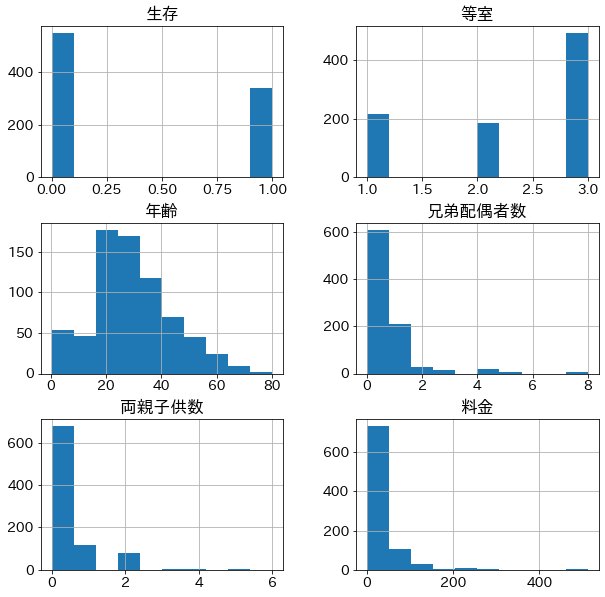

In [ ]:
# 分析対象項目のグラフ表示（数値項目）

# 数値項目の定義
columns_n = ['生存', '等室', '年齢', '兄弟配偶者数', '両親子供数', '料金']

# グラフ表示領域の調整
plt.rcParams['figure.figsize'] = (10, 10)

# データフレームの数値項目でヒストグラム表示
df_titanic[columns_n].hist()
plt.show()

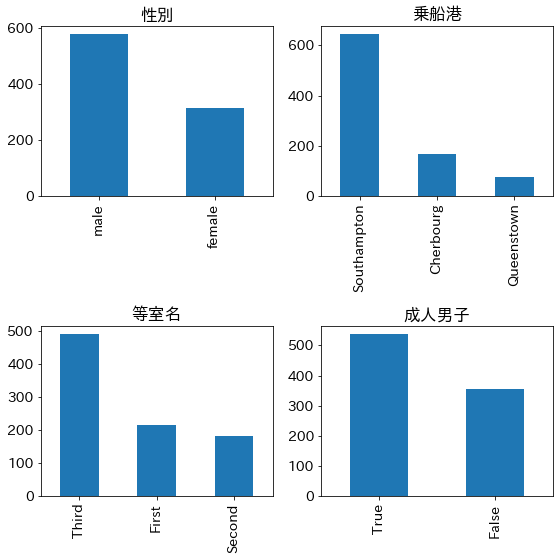

In [ ]:
# 分析対象項目のグラフ表示（非数値項目）

# グラフ化対象の定義
columns_c = ['性別', '乗船港', '等室名', '成人男子']

# グラフ描画領域の調整
plt.rcParams['figure.figsize'] = (8, 8)

# ループ処理でヒストグラムの表示
for i, name in enumerate(columns_c):
    ax = plt.subplot(2, 2, i+1)
    df_titanic[name].value_counts().plot(kind='bar', title=name, ax=ax)

# レイアウトの調整
plt.tight_layout()
plt.show()

#### 4.1.2 視覚的に分析・確認する方法 - iris -

In [4]:
import seaborn as sns

# サンプルデータの読み込み
df_iris = sns.load_dataset("iris")

# 項目名の日本語化
columns_i = ['がく片長', 'がく片幅', '花弁長', '花弁幅', '種別']
df_iris.columns = columns_i

# データの内容
display(df_iris.head())


,がく片長,がく片幅,花弁長,花弁幅,種別
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa


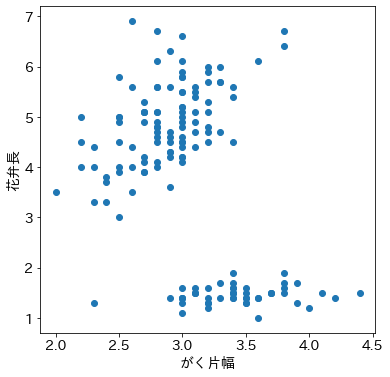

In [6]:
# 散布図表示 matplotlib 版

# グラフ描画領域の調整
plt.figure(figsize=(6, 6))

# 散布図の表示
plt.scatter(df_iris['がく片幅'], df_iris['花弁長'])

# ラベル表示
# sepal がく petal 花弁
plt.xlabel('がく片幅')
plt.ylabel('花弁長')
plt.show()

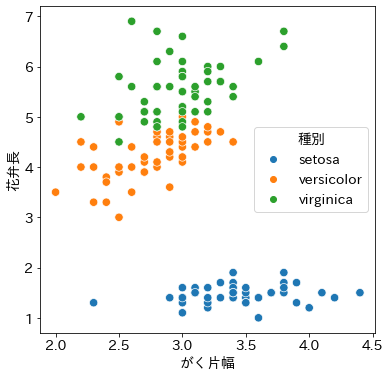

In [7]:
# 散布図表示 seaborn 版 (1)

# グラフ描画領域の調整
plt.figure(figsize=(6, 6))

# 散布図の表示
sns.scatterplot(x='がく片幅', y='花弁長', hue='種別', s=70, data=df_iris)

plt.show()

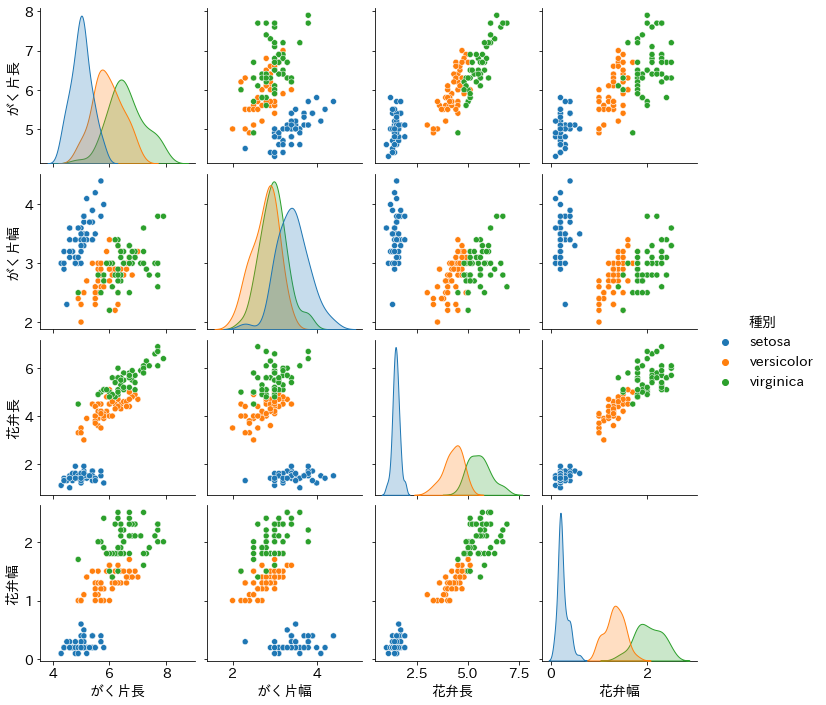

In [8]:
# 全散布図同時表示

sns.pairplot(df_iris, hue='種別')
plt.show()

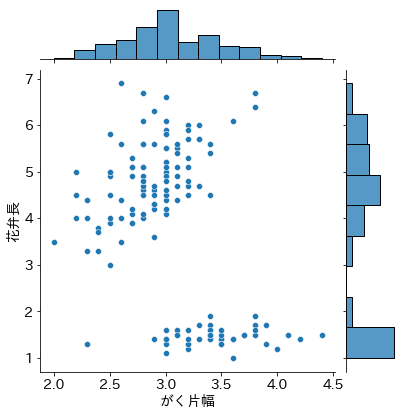

In [9]:
# 散布図表示 seaborn 版 (2)

sns.jointplot('がく片幅', '花弁長', data=df_iris)
plt.show()

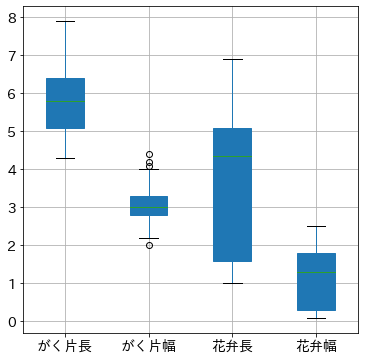

In [10]:
# 箱ひげ図表示 matplotlib 版

# グラフ描画領域の調整
plt.figure(figsize=(6,6))

# 箱ひげ図の描画
df_iris.boxplot(patch_artist=True)
plt.show()

In [11]:
# seaborn 箱ひげ図の準備

# melt 関数によるデータの事前加工
w = pd.melt(df_iris, id_vars=['種別'])

# 加工結果の確認
display(w.head())

,種別,variable,value
0,setosa,がく片長,5.1000
1,setosa,がく片長,4.9000
2,setosa,がく片長,4.7000
3,setosa,がく片長,4.6000
4,setosa,がく片長,5.0000


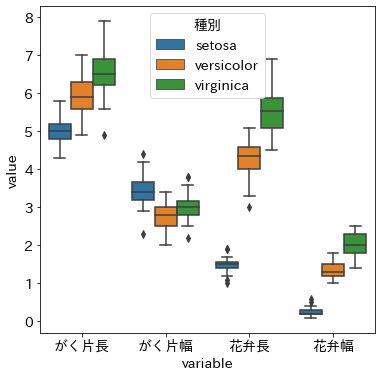

In [12]:
# seaborn による箱ひげ図表示

# hue パラメータを追加し、花の種類で箱ひげ図を書き分ける
plt.figure(figsize=(6,6))
sns.boxplot(x='variable', y='value', data=w, hue='種別')
plt.show()